# Multilingual Embeddings for Visual Question Answering

### 1. Dataset

* ViVQA

### 2. Common experiment
#### 2.1. Multilingual BERT

### 3. Experiment on Vietnamese


### 4. Experiment on English



In [ ]:
!git clone https://github.com/kh4nh12/ViVQA
!pip install translate
!pip install transformers

fatal: destination path 'ViVQA' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
#from translate import Translator


In [ ]:
train_df = pd.read_csv("ViVQA/train.csv", index_col = 0)

In [ ]:
train_df.question.loc[1194]

'màu của con ngựa là gì'

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained("bert-base-multilingual-cased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

In [ ]:
vi_text = 'màu sắc của áo thun là gì'
en_text = 'what is the color of the t-shirt'

In [ ]:
vi_text = 'màu của con ngựa là gì'
en_text = 'what is the color of the horse'

In [ ]:
encoded_inputs = tokenizer([vi_text, en_text], padding=True, truncation=True, return_tensors="pt")

In [ ]:
print(encoded_inputs['input_ids'])

tensor([[  101, 27178, 10447, 10173, 53786, 10331, 49309,   102,     0],
        [  101, 12976, 10124, 10105, 14136, 10108, 10105, 30491,   102]])


In [ ]:
output = model(**encoded_inputs)

In [ ]:
list(tokenizer.vocab.items())[101][0]

'[CLS]'

In [ ]:
tok1 = output['last_hidden_state'][0]

In [ ]:
tok2 = output['last_hidden_state'][1]

In [ ]:
import torch
values = torch.nn.functional.cosine_similarity(tok1,tok2, dim=1).detach().numpy()

In [ ]:
def getSubwordTokenizers(inputs_ids, vocab):
  ls = list(tokenizer.vocab.items())
  res = []
  for item in inputs_ids:
    res.append([ls[item[idx]][0] for idx in range(len(item))])
  return res

def sim_matrix(a, b, eps=1e-8):
    """
    added eps for numerical stability
    """
    a_n, b_n = a.norm(dim=1)[:, None], b.norm(dim=1)[:, None]
    a_norm = a / torch.max(a_n, eps * torch.ones_like(a_n))
    b_norm = b / torch.max(b_n, eps * torch.ones_like(b_n))
    sim_mt = torch.mm(a_norm, b_norm.transpose(0, 1))
    return sim_mt

In [ ]:
subwords = getSubwordTokenizers(encoded_inputs['input_ids'], tokenizer.vocab)
values = sim_matrix(tok1, tok2)

In [ ]:
def plotWordAlignment(subwords, values):
  sns.heatmap(pd.DataFrame(values.detach().numpy()).rename(dict(zip(range(len(subwords[0])), subwords[0])), axis=0)\
  .rename(dict(zip(range(len(subwords[1])), subwords[1])), axis=1), annot=True, vmin=0, vmax=0.6)

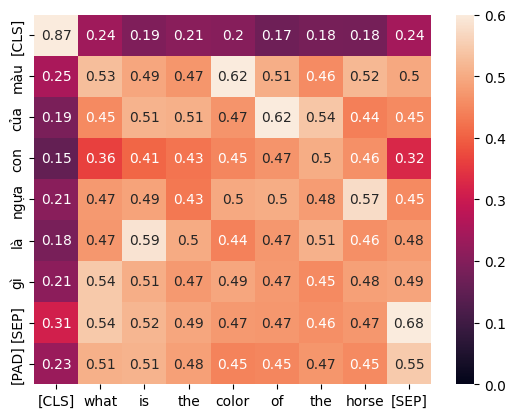

In [ ]:
plotWordAlignment(subwords, values)

In [ ]:
import seaborn as sns

In [ ]:
sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


## Try to get the text embedding from BLIP

In [ ]:
!git clone https://github.com/salesforce/BLIP


Cloning into 'BLIP'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 277 (delta 137), reused 136 (delta 135), pack-reused 112
Receiving objects: 100% (277/277), 7.03 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (152/152), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.0 MB/s eta 0:00:00


In [ ]:
!wget https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_vqa.pth

--2023-11-07 14:17:38--  https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_vqa.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.207, 74.125.26.207, 172.217.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1446244375 (1.3G) [application/octet-stream]
Saving to: ‘model_vqa.pth’

model_vqa.pth       100%[===================>]   1.35G  45.7MB/s    in 17s     

2023-11-07 14:17:55 (81.9 MB/s) - ‘model_vqa.pth’ saved [1446244375/1446244375]



In [ ]:
#%cd BLIP
!pip install  --no-cache-dir -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 163.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 226.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 280.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fairscale: filename=fairscale-0.4.13-py3-none-any.whl size=332106 sha256=9e38b0267e7ca4ffee3e533eb4aaa68dc6f45b707f8b17b3b2006dad15eb7b7e
  Stored in directory: /tmp/pip-

In [ ]:
from models.blip_vqa import blip_vqa

ModuleNotFoundError: ignored

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 12.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 19.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fairscale: filename=fairscale-0.4.4-py3-none-any.whl size=292834 sha256=1cc4ec0917bde0d4d5a73c77ad7fbe1333e05fc160e8c69fba9b92b0f95a2c2e
  Stored in directory: /root/.cache/pi

# Word alignment


### Preprocessing


In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
import re
import unicodedata

HTML_TAG_RE = re.compile(r'<[^>]+>')

acceptable_regex = r"[$&+,:;=?@#|'<>.^*()%!-]"
dict_map = {
    "òa": "oà",
    "Òa": "Oà",
    "ÒA": "OÀ",
    "óa": "oá",
    "Óa": "Oá",
    "ÓA": "OÁ",
    "ỏa": "oả",
    "Ỏa": "Oả",
    "ỎA": "OẢ",
    "õa": "oã",
    "Õa": "Oã",
    "ÕA": "OÃ",
    "ọa": "oạ",
    "Ọa": "Oạ",
    "ỌA": "OẠ",
    "òe": "oè",
    "Òe": "Oè",
    "ÒE": "OÈ",
    "óe": "oé",
    "Óe": "Oé",
    "ÓE": "OÉ",
    "ỏe": "oẻ",
    "Ỏe": "Oẻ",
    "ỎE": "OẺ",
    "õe": "oẽ",
    "Õe": "Oẽ",
    "ÕE": "OẼ",
    "ọe": "oẹ",
    "Ọe": "Oẹ",
    "ỌE": "OẸ",
    "ùy": "uỳ",
    "Ùy": "Uỳ",
    "ÙY": "UỲ",
    "úy": "uý",
    "Úy": "Uý",
    "ÚY": "UÝ",
    "ủy": "uỷ",
    "Ủy": "Uỷ",
    "ỦY": "UỶ",
    "ũy": "uỹ",
    "Ũy": "Uỹ",
    "ŨY": "UỸ",
    "ụy": "uỵ",
    "Ụy": "Uỵ",
    "ỤY": "UỴ",
    "ưã": "ữa",
    }

def replace_all(text, dict_map):
    for i, j in dict_map.items():
        text = text.replace(i, j)
    return text




def remove_html_tags(text):
    return HTML_TAG_RE.sub('', text)

def remove_urls(text):
    URL_RE = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return URL_RE.sub('', text)

def remove_text_tags(text):
    TEXT_TAG_RE = re.compile(r'#[a-zA-Z0-9-_àáâãèéêìíòóôõùúýăđĩũơưạảấầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốồổỗộớờởỡợụủứừửữựỳỵỷỹ]+')
    return TEXT_TAG_RE.sub('', text)

def clean_special_chars(text):
    text = remove_urls(text)
    text = remove_text_tags(text)
    text = text.replace('&nbsp', ' ').replace('& nbsp', ' ').replace('xa0', ' ').replace('&gt',' ').replace('&lt',' ')
    #text = re.sub('[^a-zA-Z0-9%.ÀÁÂÃÈÉÊÌÍÒÓÔÕÙÚÝàáâãèéêìíòóôõùúýĂăĐđĨĩŨũƠơƯưẠạẢảẤấẦầẨẩẪẫẬậẮắẰằẲẳẴẵẶặẸẹẺẻẼẽẾếỀềỂểỄễỆệỈỉỊịỌọỎỏỐốỒồỔổỖỗỘộỚớỜờỞởỠỡỢợỤụỦủỨứỪừỬửỮữỰựỲỳỴỵỶỷỸỹ ]+', ' ', text)
    text = re.sub('[^a-z0-9%.àáâãèéêìíòóôõùúýăđĩũơưạảấầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốồổỗộớờởỡợụủứừửữựỳỵỷỹ ]+', ' ', text)
    text = ' '.join(text.split())
    return text

def process_title(title):
    title = remove_html_tags(title.replace('>', ' > ').replace('<', ' < ').lower())
    title = clean_special_chars(title)
    title = unicodedata.normalize('NFKC', title)
    title = replace_all(title, dict_map)
    title = re.sub(acceptable_regex, "", title)
    return title



In [ ]:
process_title('trà sữa size L. là một Vị trà sưã ngon')

'trà sữa size l là một vị trà sữa ngon'

# MTet translate VQAv2

In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "VietAI/envit5-translation"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
model.cuda()


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.49M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/721 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

T5ForConditionalGeneration(
  (shared): Embedding(50048, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(50048, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=768, out_features=2048, bias=False)
              (wi_1): Linear(in_features=768, out_features=2048, bias=False)
              (wo):

In [5]:
#!touch download_vqav2.sh
!curl -fL https://raw.githubusercontent.com/dungxibo123/odemve/master/vqav2.sh?token=GHSAT0AAAAAACHS3HJNNPXZOHZ6TK7KXSM2ZK5JWVQ -o download_vqav2.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   821  100   821    0     0   4903      0 --:--:-- --:--:-- --:--:--  4916


In [7]:
!chmod +x download_vqav2.sh

!./download_vqav2.sh

--2023-11-21 23:40:06--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.162.16, 52.216.219.128, 54.231.201.192, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.162.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7239401 (6.9M) [application/zip]
Saving to: ‘v2_Questions_Train_mscoco.zip’

v2_Questions_Train_ 100%[===================>]   6.90M  26.5MB/s    in 0.3s    

2023-11-21 23:40:07 (26.5 MB/s) - ‘v2_Questions_Train_mscoco.zip’ saved [7239401/7239401]

--2023-11-21 23:40:07--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Val_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.250.126, 52.216.50.144, 16.182.40.216, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.250.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3494929 (3.3M) [application/zip]
Saving to: ‘v2_Questions_Val_mscoco.zip’



In [8]:
import json

train_questions = json.load(open("datasets/v2_OpenEnded_mscoco_train2014_questions.json", 'r'))
val_questions = json.load(open("datasets/v2_OpenEnded_mscoco_val2014_questions.json", 'r'))
train_annotations = json.load(open("datasets/v2_mscoco_train2014_annotations.json", 'r'))
val_annotations = json.load(open("datasets/v2_mscoco_val2014_annotations.json", 'r'))

In [9]:
train_questions.keys()

dict_keys(['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions'])

In [10]:
type(train_questions['questions'])

list

In [11]:
for key in train_questions:
  print(f"Type of train_questions[{key}]: {type(train_questions[key])}")

Type of train_questions[info]: <class 'dict'>
Type of train_questions[task_type]: <class 'str'>
Type of train_questions[data_type]: <class 'str'>
Type of train_questions[license]: <class 'dict'>
Type of train_questions[data_subtype]: <class 'str'>
Type of train_questions[questions]: <class 'list'>


In [12]:
train_questions['questions'][9]

{'image_id': 524291,
 'question': 'Is the dog looking at a tennis ball or frisbee?',
 'question_id': 524291002}

In [13]:
for key in train_annotations:
  print(f"Type of train_annotations[{key}]: {type(train_annotations[key])}")

Type of train_annotations[info]: <class 'dict'>
Type of train_annotations[license]: <class 'dict'>
Type of train_annotations[data_subtype]: <class 'str'>
Type of train_annotations[annotations]: <class 'list'>
Type of train_annotations[data_type]: <class 'str'>


In [14]:
en_questions = []
for item in val_questions['questions']:
  en_questions.append("en: " + item['question'])

In [15]:
from tqdm import tqdm
vi_questions = []
batch_decode_size = 1024
for i in tqdm(range(0, len(en_questions), batch_decode_size)):
  inputs = en_questions[i: i + batch_decode_size]
  outputs = model.generate(tokenizer(inputs, return_tensors="pt", padding=True).input_ids.to('cuda'), max_length=512)
  responses = tokenizer.batch_decode(outputs, skip_special_tokens=True)
  vi_questions.extend(responses)

100%|██████████| 210/210 [16:42<00:00,  4.78s/it]


In [23]:
t = 258
en_questions[t], vi_questions[t]

('en: Does the water look calm?', 'vi: Nước có vẻ yên tĩnh không?')

In [24]:
objects = []
for item in zip(en_questions, vi_questions):
  res = {}
  res['en'] = item[0][4:]
  res['vi'] = item[1][4:]
  objects.append(res)

In [26]:
json.dump(objects, open("parallel_vi_en_2.json", 'w'))